In [2]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
from pylab import plot, xlabel, ylabel, suptitle, legend, show

<style>
.center {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;
}
</style>

## Çembersel Akım Çevriminin Düzlemindeki Bir Noktada Oluşturduğu Alan Şiddeti

<img src="cember_inline.jpg" class="center" style="width:500px;">

$$\mathbf{B}=\dfrac{\mu_0}{4\pi}\int_C \dfrac{I\mathrm{d}\mathbf{l}\times \mathbf{R}}{R^3}$$

$$\mathbf{R}=r_{\mathbf{ax}}-(a\cos\theta\mathbf{a}_x+a\sin\theta\mathbf{a}_y)=(r-a\cos\theta)\mathbf{a}_x-(a\sin\theta)\mathbf{a}_x$$

$$R^2=(r-a\cos\theta)^2+a^2\sin^2\theta$$

$$R=\sqrt{a^2+r^2-2ar\cos\theta}$$

$$\mathrm{d}\mathbf{l}=a\mathrm{d}\theta(-\sin\theta\mathbf{a}_x+\cos\theta\mathbf{a}_y)$$
 
$$\mathrm{d}\mathbf{l}\times \mathbf{R}=a
\begin{vmatrix}
     \mathbf{a}_x & \mathbf{a}_y & \mathbf{a}_z\\ 
     -\sin\theta & \cos\theta & 0\\
     (r-a\cos\theta) & (-a\sin\theta) & 0
\end{vmatrix} \mathrm{d}\theta
$$

$$\mathrm{d}\mathbf{l}\times \mathbf{R}=\left(a^2\sin^2\theta-a\cos\theta(r-a\cos\theta) \right)\mathrm{d}\theta_{\mathbf{az}}=(a^2-ar\cos\theta)\mathrm{d}\theta{\mathbf{a}}_z$$

$$\mathbf{B}=\dfrac{2\mu_0 I a}{4\pi}\int_0^\pi\dfrac{a-r\cos\theta}{(a^2+r^2-2ar\cos\theta)^{3/2}}\mathrm{d}\theta{\mathbf{a}}_z$$

$$\theta=\pi-2\phi$$

$$\mathrm{d}\theta=-2\mathrm{d}\phi$$

$$\cos\theta=\cos(\pi-2\phi)=\cos(2\phi-\pi)=-\cos(2\phi)=2\sin^2(\phi)-1$$

$$\mathbf{B}=\dfrac{2\mu_0 I a}{4\pi}\int_{\pi/2}^0 \dfrac{a-2r\sin^2\phi+r}{\left(r^2-2ra(2\sin^2\phi-1)+a^2\right)^{3/2}}(-2\mathrm{d}\phi){\mathbf{a}}_z$$

$$\mathbf{B}=\dfrac{\mu_0 I a}{\pi}\int_0^{\pi/2} \dfrac{a-2r\sin^2\phi+r}{\left(r^2-2ra(2\sin^2\phi-1)+a^2\right)^{3/2}}\mathrm{d}\phi{\mathbf{a}}_z$$

$$\mathbf{B}=\dfrac{\mu_0 I a}{\pi}\int_0^{\pi/2} \dfrac{a-2r\sin^2\phi+r}{\left((r+a)^2-4ra\sin^2\phi\right)^{3/2}}\mathrm{d}\phi{\mathbf{a}}_z$$

$$\mathbf{B}=\dfrac{\mu_0 I a}{\pi}\int_0^{\pi/2} \dfrac{a-2r\sin^2\phi+r}{\left((r+a)^2(1-\dfrac{4ra}{(r+a)^2}\sin^2\phi\right)^{3/2}}\mathrm{d}\phi{\mathbf{a}}_z$$

$$\boxed{\mathbf{B}=\dfrac{\mu_0 I}{\pi(r+a)^3}\int_0^{\pi/2} \dfrac{a^2-2ra\sin^2\phi+ra}{(1-k^2\sin^2\phi)^{3/2}}\mathrm{d}\phi{\mathbf{a}}_z}$$

$$k=\dfrac{2\sqrt{ra}}{r+a}$$

$$ \begin{aligned}
    \mathrm{d}\mathbf{B}=
    \end{aligned}$$




1.4181666035221097e-06


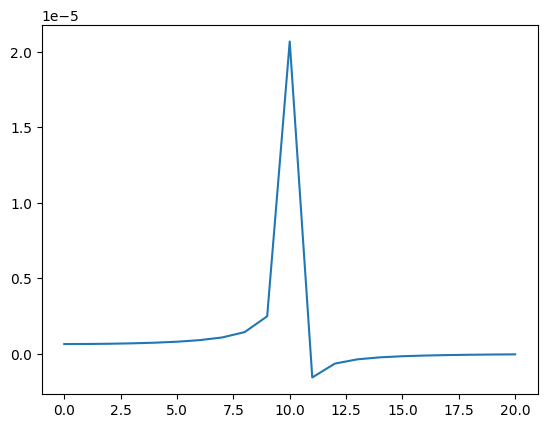

In [3]:
x,r,a = smp.symbols('x r a', real=True)
r, a = 0.5, 1
m0 = 4E-7*np.pi
ii = 1
B = np.zeros(21)
B = B.tolist()
for i in range(0,21,1):
    r = i/10
    if r == 1:
        r = 0.99      
    k=2*smp.sqrt(r*a)/(r+a)

    f = lambda x:(a**2-2*r*a*smp.sin(x)**2+r*a) / (1-k**2*smp.sin(x)**2)**(3/2)


    I, err = quad(f, 0, np.pi/2)

    B[i] = I*(m0*ii)/(np.pi*(r+a)**3)
print(B[8])
xs = [x for x in range(len(B))]
plt.plot(xs,B)
plt.show()



In [4]:
import numpy as np
from delaunay2D import Delaunay2D
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import codecs

filecp = codecs.open('TE1.DAT', encoding ='utf-8')
file_data = np.loadtxt(filecp, usecols=(0,1),skiprows=1)

#print(file_data)
x = file_data[:,0]
print(x)

y = file_data[:,1]
print(y)

seeds = np.vstack((x, y)).T
print(seeds)

#zip(x,y)

# Create a random set of points


# Create Delaunay Triangulation and insert points one by one
dt = Delaunay2D()
for s in seeds:
    dt.addPoint(s)

tri = Delaunay(seeds)

# Dump points and triangles to console
print("Input points:\n", seeds)
print ("Delaunay triangles:\n", dt.exportTriangles())

plt.triplot(seeds[:,0], seeds[:,1], tri.simplices)
plt.plot(seeds[:,0], seeds[:,1], 'o')
plt.show()



ModuleNotFoundError: No module named 'delaunay2D'